# 1470 final project notebook

In [2]:
!python3 -VV

Python 3.9.10 (v3.9.10:f2f3f53782, Jan 13 2022, 17:02:14) 
[Clang 6.0 (clang-600.0.57)]


Package Imports

In [36]:
pip install -U scikit-learn scipy matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 8.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.3/34.3 MB 9.6 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 10.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 6.5 MB/s eta 0:00:0000:01
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.6.0
    Uninstalling matplotlib-3.6.0:
      Successfully uninstalled matplotlib-3.6.0

[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [42]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import tensorflow as tf
import tensorflow_datasets as tfds
import sklearn as sk
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

Code Imports

In [13]:
%load_ext autoreload
%autoreload 2
import   assignment, conv_model, layers_keras, layers_manual
%aimport assignment, conv_model, layers_keras, layers_manual

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Data Pathing

## Data Preprocessing: IAUFD !

In [63]:
#data = assignment.get_data()
#X0, Y0, X1, Y1, D0, D1, D_info = data

In [23]:
data = assignment.divide_data()
X0, Y0  = data

print(X0.shape)

(1165, 32, 32, 3)


In [48]:
#print all labels

print(X0.shape)
print(Y0.shape)

Y0 = Y0[0:1165]

Y0 = np.asarray(Y0).astype("float64")

print(Y0.shape)

print(Y0[10])

(1165, 32, 32, 3)
(1165, 10)
(1165, 10)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [47]:
print(Y0.type)

AttributeError: 'numpy.ndarray' object has no attribute 'type'


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: pip install --upgrade pip


In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X0, Y0, random_state=42, test_size=0.1)



In [50]:
model = Sequential()

model.add(Conv2D(64, (3,3), input_shape=[32,32,3], strides=(2,2), padding='same', activation=tf.nn.relu,  kernel_initializer='he_uniform'))
model.add(Conv2D(64,(3,3), input_shape=[32,32,3], strides=(2,2),padding='same', activation=tf.nn.relu, kernel_initializer='he_uniform'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), padding='same'))

model.add(Conv2D(128, (3,3), input_shape=[32,32,3], strides=(2,2), padding='same', activation=tf.nn.relu,  kernel_initializer='he_uniform'))
model.add(Conv2D(128,(3,3), input_shape=[32,32,3], strides=(2,2),padding='same', activation=tf.nn.relu, kernel_initializer='he_uniform'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), padding='same'))

model.add(Conv2D(256, (3,3), input_shape=[32,32,3], strides=(2,2), padding='same', activation=tf.nn.relu,  kernel_initializer='he_uniform'))
model.add(Conv2D(256, (3,3), input_shape=[32,32,3], strides=(2,2), padding='same', activation=tf.nn.relu,  kernel_initializer='he_uniform'))
model.add(Conv2D(256,(3,3), input_shape=[32,32,3], strides=(2,2),padding='same', activation=tf.nn.relu, kernel_initializer='he_uniform'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), padding='same'))

model.add(Conv2D(512, (3,3), input_shape=[32,32,3], strides=(2,2), padding='same', activation=tf.nn.relu,  kernel_initializer='he_uniform'))
model.add(Conv2D(512, (3,3), input_shape=[32,32,3], strides=(2,2), padding='same', activation=tf.nn.relu,  kernel_initializer='he_uniform'))
model.add(Conv2D(512,(3,3), input_shape=[32,32,3], strides=(2,2),padding='same', activation=tf.nn.relu, kernel_initializer='he_uniform'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), padding='same'))

model.add(Conv2D(512, (3,3), input_shape=[32,32,3], strides=(2,2), padding='same', activation=tf.nn.relu,  kernel_initializer='he_uniform'))
model.add(Conv2D(512, (3,3), input_shape=[32,32,3], strides=(2,2), padding='same', activation=tf.nn.relu,  kernel_initializer='he_uniform'))
model.add(Conv2D(512,(3,3), input_shape=[32,32,3], strides=(2,2),padding='same', activation=tf.nn.relu, kernel_initializer='he_uniform'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), padding='same'))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(4096, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(4096, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation='softmax'))


In [51]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [52]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=100)

Epoch 1/10
11/11 [==============================] - 28s 2s/step - loss: 0.4774 - accuracy: 0.3044 - val_loss: 0.2368 - val_accuracy: 0.0598
Epoch 2/10
11/11 [==============================] - 26s 2s/step - loss: 0.2273 - accuracy: 0.3683 - val_loss: 0.2199 - val_accuracy: 0.4103
Epoch 3/10
11/11 [==============================] - 29s 3s/step - loss: 0.2212 - accuracy: 0.3807 - val_loss: 0.2184 - val_accuracy: 0.4103
Epoch 4/10
11/11 [==============================] - 27s 2s/step - loss: 0.2206 - accuracy: 0.3807 - val_loss: 0.2199 - val_accuracy: 0.4103
Epoch 5/10
11/11 [==============================] - 26s 2s/step - loss: 0.2196 - accuracy: 0.3807 - val_loss: 0.2182 - val_accuracy: 0.4103
Epoch 6/10
11/11 [==============================] - 27s 2s/step - loss: 0.2187 - accuracy: 0.3807 - val_loss: 0.2172 - val_accuracy: 0.4103
Epoch 7/10
11/11 [==============================] - 27s 2s/step - loss: 0.2194 - accuracy: 0.3807 - val_loss: 0.2175 - val_accuracy: 0.4103
Epoch 8/10
11/11 [==

### Augmenting train data

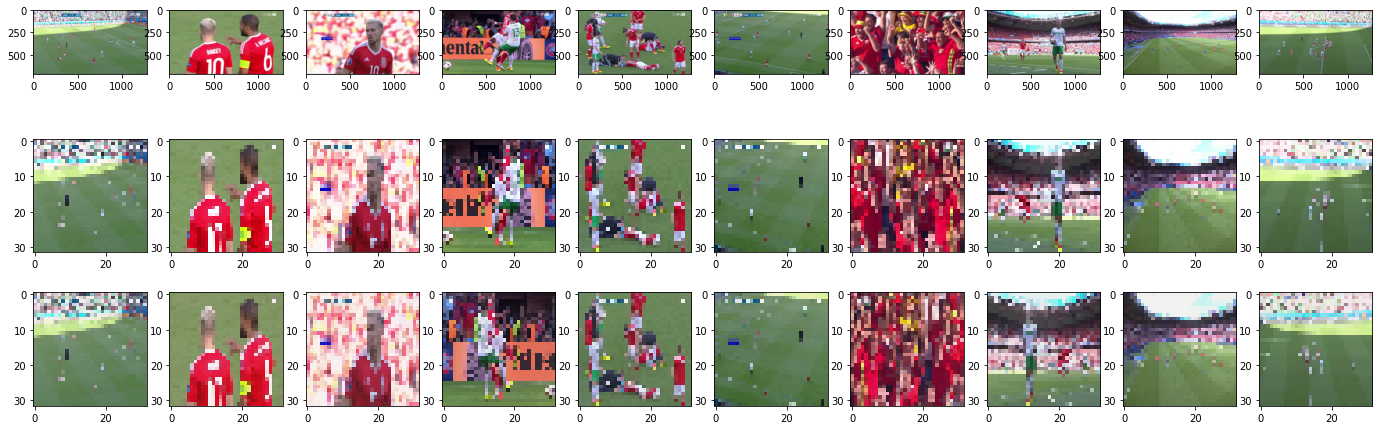

In [15]:
import conv_model

## You can use any list of 10 indices
sample_image_indices = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
sample_images = tf.cast(tf.gather(X0, sample_image_indices), tf.float32)
sample_labels = tf.gather(Y0, sample_image_indices)

fig, ax = plt.subplots(3, 10)
fig.set_size_inches(24, 8)

args = conv_model.get_default_CNN_model()

preprocessed_images = args.model.input_prep_fn(sample_images)
augmented_images = args.model.augment_fn(preprocessed_images)

for i in range(10):
    ax[0][i].imshow(sample_images[i]/255., cmap = "Greys")
    ax[1][i].imshow(preprocessed_images[i], cmap = "Greys")
    ax[2][i].imshow(augmented_images[i], cmap = "Greys")

## Train A Basic Keras Model

As part of step 2 from the handout, we just want you to construct a simple keras model to run prediction on your dataset!

Implement **[TODO 2]** in `get_default_CNN_model` to return a CNN model that can train above an accuracy of 55% (note that the requirement for 1470 is 62% and for 2470, is 65% though). Feel free to play around with the number of layers, hyperparameters for layers, epochs, batch size, and anything else you can think of. 

**Requirements:**
- Model must contain Conv2D, BatchNormalization, and Dropout layers. 
- These must be imported from the argument namespaces (already done by default).
- Task 1 will automatically use `tf.keras.layers` implementations.

In [18]:
import assignment 

## You can test with more epochs later
cnn_model = assignment.run_task(data, 1, epochs=10, batch_size=250)

Starting Model Training
Epoch 1/10


InvalidArgumentError: Exception encountered when calling layer "category_encoding_3" (type CategoryEncoding).

Value for attr 'T' of string is not in the list of allowed values: float, double, int32, uint8, int16, int8, int64, bfloat16, uint16, half, uint32, uint64, qint8, quint8, qint32, qint16, quint16
	; NodeDef: {{node Max}}; Op<name=Max; signature=input:T, reduction_indices:Tidx -> output:T; attr=keep_dims:bool,default=false; attr=T:type,allowed=[DT_FLOAT, DT_DOUBLE, DT_INT32, DT_UINT8, DT_INT16, DT_INT8, DT_INT64, DT_BFLOAT16, DT_UINT16, DT_HALF, DT_UINT32, DT_UINT64, DT_QINT8, DT_QUINT8, DT_QINT32, DT_QINT16, DT_QUINT16]; attr=Tidx:type,default=DT_INT32,allowed=[DT_INT32, DT_INT64]> [Op:Max]

Call arguments received:
  • inputs=tf.Tensor(shape=(10, 10), dtype=string)
  • count_weights=None

In [46]:
import assignment 

## You can test with more epochs later
cnn_model = assignment.run_task(data, 2, epochs=10, batch_size=100)

ValueError: not enough values to unpack (expected 7, got 4)

In [47]:
cnn_model.summary()

NameError: name 'cnn_model' is not defined

## Make Your Own Layers
For steps 3, 4, and 5 from the handout, you'll need to implement the layers from scratch inside of `layers_keras.py`.
Feel free to refer to the official documentation for how these methods are supposed to function. 
More details are included in the layer block comments, and the init methods are already provided. 

**Requirements**:
- Implement Conv2D, BatchNormalization, and Dropout in `layers_keras.py`
- Cannot use existing layers as sub-components. 
- Cannot use `tf.nn.batch_normalization` or `tf.nn.dropout`. 
- CAN use `tf.nn.convolution`...
- Should utilize all non-commented-out arguments. 

### 2D Convolution

Use the below code block to confirm that your custom implementation of Conv2D runs without erroring. This does not guarantee that your forward pass calculations are correct. It serves only as a preliminary check.

In [48]:
import layers_keras

random_input = tf.random.uniform((1, 4, 4, 3), 0, 10, dtype=tf.float32)

seed = 8675309
tf.random.set_seed(seed)
conv_layer = layers_keras.Conv2D(1, 2, strides=2)
print("Output:", conv_layer(random_input, training=True))

tf.random.set_seed(seed)
conv_layer = tf.keras.layers.Conv2D(1, 2, strides=2)
print('Expected:', conv_layer(random_input, training=True))

Output: tf.Tensor(
[[[[-1.3874068]
   [ 1.8371265]]

  [[ 4.395982 ]
   [ 5.2402725]]]], shape=(1, 2, 2, 1), dtype=float32)
Expected: tf.Tensor(
[[[[-1.3874068]
   [ 1.8371265]]

  [[ 4.395982 ]
   [ 5.2402725]]]], shape=(1, 2, 2, 1), dtype=float32)


### Batch Normalization

Use the below code block to confirm that your custom implementation of Batch Normalization runs without erroring. This does not guarantee that your forward pass calculations are correct. It serves only as a preliminary check.

In [49]:
import layers_keras

random_input = tf.random.uniform((3,3), 0, 10, dtype=tf.float32)
print("Input:", random_input)

batch_norm = layers_keras.BatchNormalization()
print("Output:", batch_norm(random_input, training=True))

batch_norm = tf.keras.layers.BatchNormalization()
print('Expected:', batch_norm(random_input, training=True))

Input: tf.Tensor(
[[4.9200354  4.1594877  0.15996099]
 [0.17104864 3.8494146  4.5375834 ]
 [3.0904114  8.937246   6.2552547 ]], shape=(3, 3), dtype=float32)
Output: tf.Tensor(
[[ 1.1211212  -0.6394283  -1.3602844 ]
 [-1.3068336  -0.7725641   0.3454902 ]
 [ 0.18571232  1.4119927   1.0147942 ]], shape=(3, 3), dtype=float32)
Expected: tf.Tensor(
[[ 1.1211214  -0.6394284  -1.3602844 ]
 [-1.3068336  -0.7725642   0.3454901 ]
 [ 0.18571234  1.4119925   1.0147942 ]], shape=(3, 3), dtype=float32)


### Dropout

Use the below code block to confirm that your custom implementation of Dropout runs without erroring. This does not guarantee that your forward pass or input gradients calculations are correct. It serves only as a preliminary check.

In [50]:
import layers_keras

random_input = tf.ones((2, 11))
print("Input:\n", random_input)

seed = 8675309
for mode_str, mode in zip(['Training', 'Testing'], [True, False]):
    print()
    for layer_str, layer in zip(['Output','Expected'], [layers_keras.Dropout, tf.keras.layers.Dropout]):
        tf.random.set_seed(seed)
        dropout_fn = layer(rate=0.2)
        print(f'{layer_str} {mode_str}:')
        print(dropout_fn(random_input, training=mode))

# Expected: Around rate% of the entries should be zeros in training mode.
#   Should also be normalized such that, on average, magnitude perserved.

Input:
 tf.Tensor(
[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]], shape=(2, 11), dtype=float32)

Output Training:
tf.Tensor(
[[1.25 1.25 1.25 1.25 1.25 1.25 0.   1.25 1.25 1.25 0.  ]
 [1.25 1.25 1.25 1.25 1.25 0.   1.25 0.   0.   1.25 1.25]], shape=(2, 11), dtype=float32)
Expected Training:
tf.Tensor(
[[1.25 1.25 1.25 1.25 1.25 1.25 0.   1.25 1.25 1.25 0.  ]
 [1.25 1.25 1.25 1.25 1.25 0.   1.25 0.   0.   1.25 1.25]], shape=(2, 11), dtype=float32)

Output Testing:
tf.Tensor(
[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]], shape=(2, 11), dtype=float32)
Expected Testing:
tf.Tensor(
[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]], shape=(2, 11), dtype=float32)


### Training your model
Now, let's see if your model works with the new components in place?

In [51]:
import assignment 

# assignment.run_task(data, 2, 1, epochs=2)   ## Just manual conv
# assignment.run_task(data, 2, 2, epochs=2)   ## Just manual bnorm
# assignment.run_task(data, 2, 3, epochs=2)   ## Just manual dropout
assignment.run_task(data, 2, epochs=2)        ## Test all 3!

ValueError: not enough values to unpack (expected 7, got 4)

## Manual Convolution!

Now, go ahead and implement convolution manually! This should be done inside of the `layers_manual.py` file. It's very non-trivial to perform convolution differentiably without using `tf.nn.convolution`, so the manual convolution should only run during inference time. Below is a quick test to see if your convolution is consistent with the Keras layered version:

In [52]:
import layers_manual

random_input = tf.random.uniform((2, 4, 4, 3), 0, 10, dtype=tf.float32)

seed = 8675309
tf.random.set_seed(seed)
conv_layer = layers_manual.Conv2D(1, (2, 2), strides=2, padding='valid')
print("Output:", conv_layer(random_input, training=False))

tf.random.set_seed(seed)
conv_layer = tf.keras.layers.Conv2D(1, (2, 2), strides=2, padding='valid')
print('Expected:', conv_layer(random_input, training=False))

Output: tf.Tensor(
[[[[ 4.985508  ]
   [ 0.72873664]]

  [[ 3.8827434 ]
   [-1.1475484 ]]]


 [[[-3.088588  ]
   [-1.837323  ]]

  [[-5.2728376 ]
   [ 0.12673473]]]], shape=(2, 2, 2, 1), dtype=float32)
Expected: tf.Tensor(
[[[[ 4.9855075 ]
   [ 0.72873664]]

  [[ 3.8827434 ]
   [-1.1475487 ]]]


 [[[-3.0885882 ]
   [-1.8373222 ]]

  [[-5.272838  ]
   [ 0.12673473]]]], shape=(2, 2, 2, 1), dtype=float32)


Inside the loop, this will happen at the end of every epoch because a validation set is being evaluated alongside your training set. The following will test it out for you! Don't worry if your categorical accuracy looks low here. As long as everything works without erroring, feel free to move on and test the whole model together.

In [53]:
import assignment 

assignment.run_task(data, 3, epochs=5)

ValueError: not enough values to unpack (expected 7, got 4)

## Wrapping Up

Make sure your model runs and trains up to standards! When you find a model configuration that you like, feel free to update your `get_default_CNN_model` function so that the autograder can use it with your arguments. If your model takes too long to train (> 10 mins), the autograder may time out, so take consideration of that. 

In [54]:
## Run at least once
from types import SimpleNamespace
from conv_model import CustomSequential

For convenience, you can copy your code here for quick testing!

Make sure to put it back into your `conv_model.py` file for the autograder!

In [55]:
def get_default_CNN_model(
    conv_ns=tf.keras.layers,
    norm_ns=tf.keras.layers,
    drop_ns=tf.keras.layers,
    man_conv_ns=tf.keras.layers,
):
    return None

In [56]:
conv_ns = tf.keras.layers
norm_ns = tf.keras.layers
drop_ns = tf.keras.layers
man_conv_ns = tf.keras.layers

args = get_default_CNN_model(
    conv_ns=conv_ns, 
    norm_ns=norm_ns, 
    drop_ns=drop_ns, 
    man_conv_ns=man_conv_ns
)

history = args.model.fit(
    X0,
    Y0,
    epochs=args.epochs,
    batch_size=args.batch_size,
    validation_data=(X1, Y1),
)

AttributeError: 'NoneType' object has no attribute 'model'

### Sanity Checks

In case you need them!

In [57]:
P1 = np.argmax(cnn_model.predict(X1), -1)
confusion_mtx = tf.math.confusion_matrix(P1, Y1)

P0 = np.argmax(cnn_model.predict(X0), -1)
confusion_mtx = tf.math.confusion_matrix(P0, Y0)
plt.figure(figsize=(12, 9))
plt.imshow(confusion_mtx, cmap='hot', interpolation='nearest')

NameError: name 'cnn_model' is not defined

In [58]:
P1 = np.argmax(cnn_model.predict(X1), -1)
confusion_mtx = tf.math.confusion_matrix(P1, Y1)
plt.figure(figsize=(12, 9))
plt.imshow(confusion_mtx, cmap='hot', interpolation='nearest')

NameError: name 'cnn_model' is not defined

NameError: name 'cnn_model' is not defined

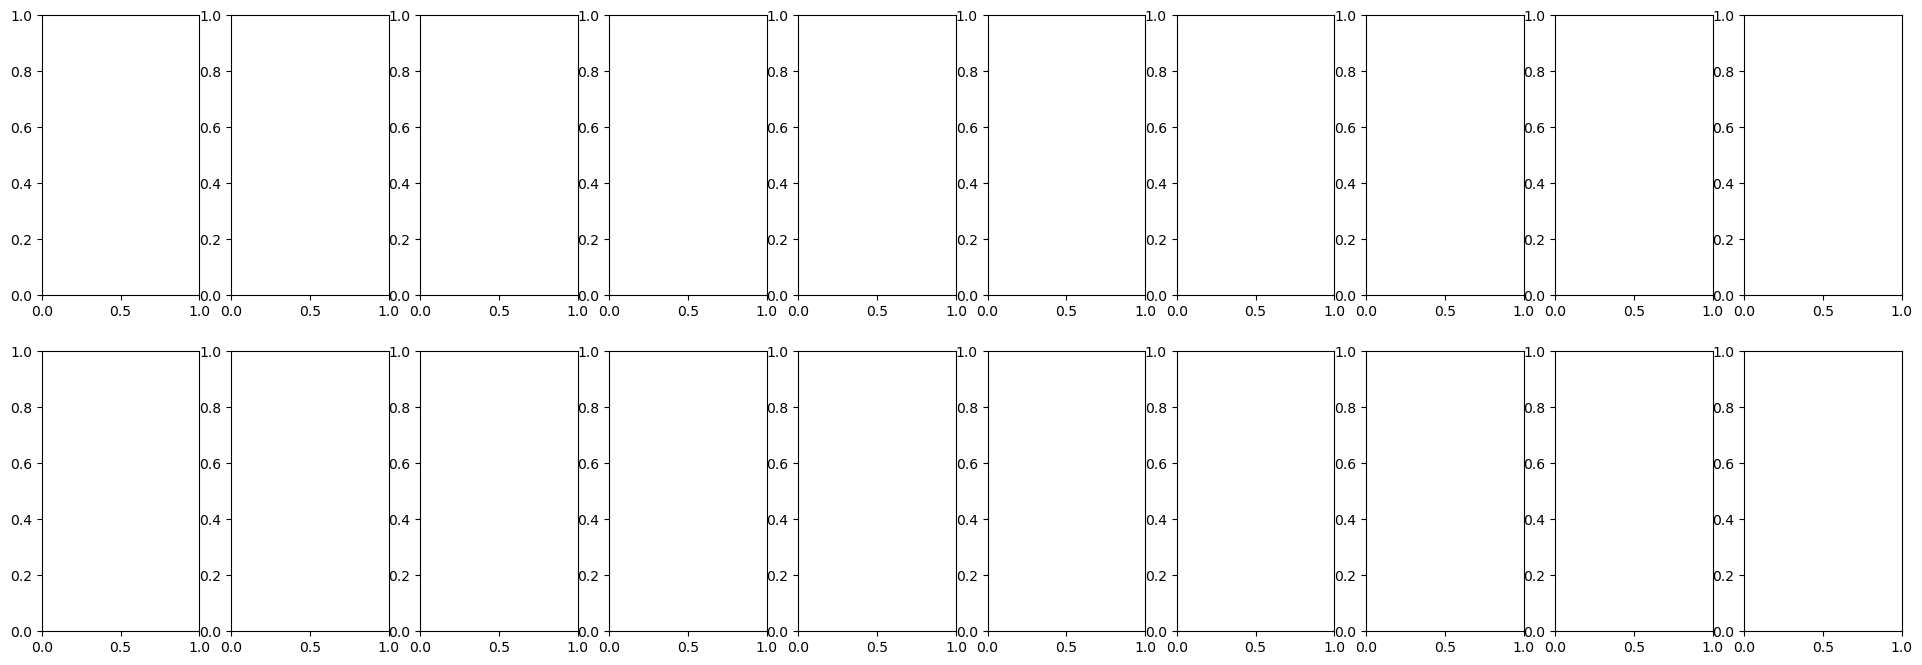

In [59]:
fig, ax = plt.subplots(2, 10)
fig.set_size_inches(24, 8)

pred0 = cnn_model.predict(X0[:10])
pred1 = cnn_model.predict(X1[:10])

def p2l(pred):
    return D_info.features['label']._int2str[pred]

for i in range(10):
    ax[0][i].imshow(X0[i], cmap = "Greys")
    ax[1][i].imshow(X1[i], cmap = "Greys")
    ax[1][i].tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
    ax[0][i].set_xlabel(f"Pred {p2l(np.argmax(pred0[i], -1))} | {p2l(Y0[i])}")    
    ax[1][i].set_xlabel(f"Pred {p2l(np.argmax(pred1[i], -1))} | {p2l(Y1[i])}")

: 

: 

: 

: 

: 

: 